In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

In [2]:
salary = pd.read_csv('D:/execlr/Assignments/Assignment 4/Salary_Data.csv')
salary

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [4]:
salary.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


<AxesSubplot:>

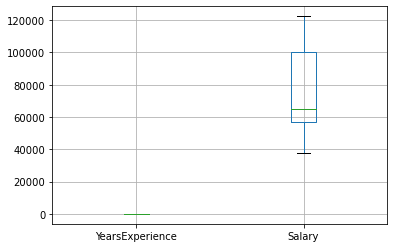

In [5]:
salary.boxplot()

<AxesSubplot:title={'center':'Scatter Plot of Delivery Time'}, xlabel='YearsExperience', ylabel='Salary'>

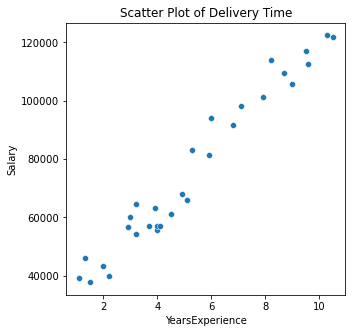

In [9]:
plt.figure(figsize=(5,5))
plt.title('Scatter Plot of Delivery Time')
sns.scatterplot(x='YearsExperience',y='Salary',data=salary,palette='set1')

<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

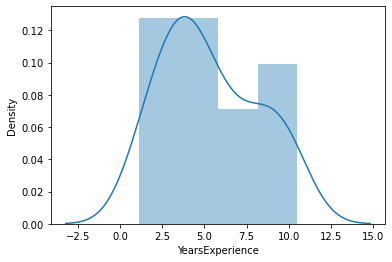

In [6]:
sns.distplot(salary['YearsExperience'])

<AxesSubplot:xlabel='Salary', ylabel='Density'>

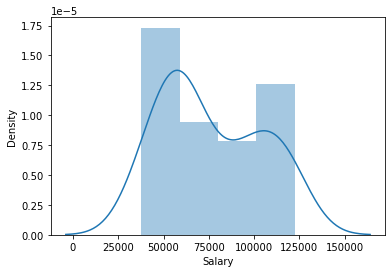

In [7]:
sns.distplot(salary['Salary'])

In [8]:
salary.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

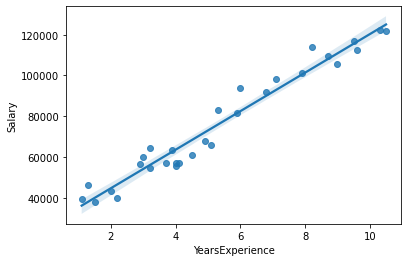

In [10]:
sns.regplot(x = salary['YearsExperience'],y = salary['Salary'])

In [17]:
model = smf.ols('Salary~YearsExperience',data =salary).fit()
model

In [18]:
# Finding Coefficient Parameters
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [21]:
# Finding P value
model.pvalues

Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64

In [22]:
# Finding T value

In [23]:
model.tvalues

Intercept          11.346940
YearsExperience    24.950094
dtype: float64

In [25]:
# Finding R Squared and R Squared_Adj
print(model.rsquared)
print(model.rsquared_adj)

0.9569566641435086
0.9554194021486339


## Model Predictions

In [26]:
# Manual prediction for 3 years Experience
salary1 = (25792.200199) + (9449.962321) * 3
salary1

54142.087162

In [27]:
# Automatic Prediction
data = pd.Series([3,5])
data

0    3
1    5
dtype: int64

In [28]:
data_pred = pd.DataFrame(data,columns=['YearsExperience'])
data_pred

,YearsExperience
0,3
1,5


In [29]:
model.predict(data_pred)

0    54142.087163
1    73042.011806
dtype: float64

In [30]:
predicted1 = pd.DataFrame()
predicted1['YearsExperience'] = salary.YearsExperience
predicted1['Salary'] = salary.Salary
predicted1['Predicted_Salary_hike'] = pd.DataFrame(model.predict(salary))
predicted1


,YearsExperience,Salary,Predicted_Salary_hike
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306
5,2.9,56642.0,53197.090931
6,3.0,60150.0,54142.087163
7,3.2,54445.0,56032.079627
8,3.2,64445.0,56032.079627
9,3.7,57189.0,60757.060788
